#Upload and Reading the csv

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
# Upload file
uploaded = files.upload()
# Exception Handling
file_path = "/content/student_depression_dataset.csv"
try:
    # Read the csv
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the path.")
    exit()

Saving student_depression_dataset.csv to student_depression_dataset (5).csv
File loaded successfully!


#Data Preprocessing and Cleaning

In [92]:
""" Major concerms in the data processing :
Dropping unnecessary ID column
Cleaning string-format durations
Encoding binary columns
Handling missing values
Label encoding for categoricals
Feature scaling """
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
df=pd.read_csv(file_path)
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [93]:
df


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [94]:
# checking columns
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

 # Dataset Feature Description
1.Gender (binary: 0 - Male, 1 - Female)

=Student's biological sex.

2.Age (numeric: age in years; range: ~18 to 40)

=Student's age.

3.City (categorical: encoded as numeric or one-hot)

=City of residence (e.g., Bangalore, Jaipur, Srinagar).

4.Profession (binary: 0 - Non-student, 1 - Student)

=Whether the person is a student.

5.Academic Pressure (numeric: Likert scale 1 to 5)

=Student's perceived academic pressure level.

6.Work Pressure (numeric: Likert scale 1 to 5)

=Student’s perceived work pressure level.

7.CGPA (numeric: GPA on a 10-point scale)

=Student’s academic performance.

8.Study Satisfaction (numeric: Likert scale 1 to 5)

=How satisfied the student is with their study routine.

9.Job Satisfaction (numeric: Likert scale 1 to 5)

=Applicable if working part-time; else usually 0.

10.Sleep Duration (categorical: 0 - <5 hrs, 1 - 5–6 hrs, 2 - 7–8 hrs, 3 - >8 hrs)

=Usual nightly sleep duration.

11.Dietary Habits (categorical: 0 - Unhealthy, 1 - Moderate, 2 - Healthy)

=Self-reported eating habits.

12.Degree (categorical: e.g., 0 - BA, 1 - BSc, 2 - B.Pharm, etc.)

=Educational degree pursued.

13.Have you ever had suicidal thoughts? (binary: 0 - No, 1 - Yes)

=Self-reported past suicidal ideation.

14.Work/Study Hours (numeric: daily average in hours)

=Average hours spent on work or studies per day.

15.Financial Stress (numeric: Likert scale 1 to 5)

=Degree of financial burden felt by the student.

16.Family History of Mental Illness (binary: 0 - No, 1 - Yes)

=Whether there’s a diagnosed mental illness in the family.

17.Depression (target variable - binary: 0 - No Depression, 1 - Depression)

=Whether the student is classified as experiencing depression.

1.Duplicate values

In [96]:
# Drop the 'id' column
df = df.drop(columns=['id'])

In [97]:
# Drop the 'Work Pressure' column as most of the values are zero except 3
df = df.drop(columns=['Work Pressure'])

In [98]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
27896,False
27897,False
27898,False
27899,False


In [99]:
#Drop exact duplicates
df.drop_duplicates(inplace=True)

2. Missing values

In [100]:
# Check for missing values
print(df.isnull().sum())

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


3. Cleaning and Encoding

In [101]:
# Clean 'Sleep Duration' and profession of single quotes
df['Sleep Duration'] = df['Sleep Duration'].str.replace("'", "").str.strip()
df['Profession'] = df['Profession'].str.replace("'", "").str.strip()
df['Degree'] = df['Degree'].str.replace("'", "").str.strip()

In [102]:
# Binary categorical columns
binary_columns = [
    "Have you ever had suicidal thoughts ?",
    "Family History of Mental Illness"
]
for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [103]:
 # Fix CGPA if zero
mean_cgpa = df.loc[df['CGPA'] != 0, 'CGPA'].mean()
df['CGPA'] = df['CGPA'].fillna(mean_cgpa)

 # Fix Work/Study Hours if zero
non_zero_mean = df.loc[df['Work/Study Hours'] != 0, 'Work/Study Hours'].mean()
df['Work/Study Hours'] = df['Work/Study Hours'].replace(0, non_zero_mean)

In [104]:
# Convert to numeric (turn '?' into NaN), then fill NaN with mean
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].mean())


In [105]:

# Encode Gender
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
# One-Hot Encode 'Profession'
df = pd.get_dummies(df, columns=['Profession'], drop_first=True)

# One-Hot Encode 'City'
df = pd.get_dummies(df, columns=['City'], drop_first=True)

# Ordinal encoding for 'Dietary Habits'
diet_map = {'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2, 'Others': 1}
df['Dietary Habits'] = df['Dietary Habits'].map(diet_map)

#  One- Hot  encode Degree
df = pd.get_dummies(df, columns=['Degree'], drop_first=True)

# Encode Sleep Duration to numbers
sleep_map = {
    "Less than 5 hours": 4.5,
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "More than 8 hours": 9,
    'Others': 6
}
df['Sleep Duration'] = df['Sleep Duration'].map(sleep_map)


In [106]:
ordinal_cols = ['Academic Pressure', 'Study Satisfaction', 'Job Satisfaction','Work/Study Hours','Age']
for col in ordinal_cols:
    df[col] = df[col].astype(float)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Columns: 104 entries, Gender to Degree_PhD
dtypes: bool(91), float64(8), int64(5)
memory usage: 5.2 MB


In [108]:
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Profession_Chef,Profession_Civil Engineer,Profession_Content Writer,Profession_Digital Marketer,Profession_Doctor,Profession_Educational Consultant,Profession_Entrepreneur,Profession_Lawyer,Profession_Manager,Profession_Pharmacist,Profession_Student,Profession_Teacher,Profession_UX/UI Designer,City_'Less than 5 Kalyan',City_3.0,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhavna,City_Bhopal,City_Chennai,City_City,City_Delhi,City_Faridabad,City_Gaurav,City_Ghaziabad,City_Harsh,City_Harsha,City_Hyderabad,City_Indore,City_Jaipur,City_Kalyan,City_Kanpur,City_Khaziabad,City_Kibara,City_Kolkata,City_Lucknow,City_Ludhiana,City_M.Com,City_M.Tech,City_ME,City_Meerut,City_Mihir,City_Mira,City_Mumbai,City_Nagpur,City_Nalini,City_Nalyan,City_Nandini,City_Nashik,City_Patna,City_Pune,City_Rajkot,City_Rashi,City_Reyansh,City_Saanvi,City_Srinagar,City_Surat,City_Thane,City_Vaanya,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,Degree_B.Com,Degree_B.Ed,Degree_B.Pharm,Degree_B.Tech,Degree_BA,Degree_BBA,Degree_BCA,Degree_BE,Degree_BHM,Degree_BSc,Degree_Class 12,Degree_LLB,Degree_LLM,Degree_M.Com,Degree_M.Ed,Degree_M.Pharm,Degree_M.Tech,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,1,33.0,5.0,8.97,2.0,0.0,5.5,2,1,3.0,1.0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,24.0,2.0,5.90,5.0,0.0,5.5,1,0,3.0,2.0,1,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1,31.0,3.0,7.03,5.0,0.0,4.5,2,0,9.0,1.0,1,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,28.0,3.0,5.59,2.0,0.0,7.5,1,1,4.0,5.0,1,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0,25.0,4.0,8.13,3.0,0.0,5.5,1,1,1.0,1.0,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,

In [109]:
# View all column names
pd.set_option('display.max_columns', None)

print(df.columns)


Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       ...
       'Degree_MA', 'Degree_MBA', 'Degree_MBBS', 'Degree_MCA', 'Degree_MD',
       'Degree_ME', 'Degree_MHM', 'Degree_MSc', 'Degree_Others', 'Degree_PhD'],
      dtype='object', length=104)


#Training

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separate features and target
X = df.drop(columns=['Depression'])
y = df['Depression']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Predict
y_pred = svm_model.predict(X_test_scaled)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")



Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2313
           1       0.85      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581


Confusion Matrix:
[[1804  509]
 [ 379 2889]]

Accuracy: 0.8409


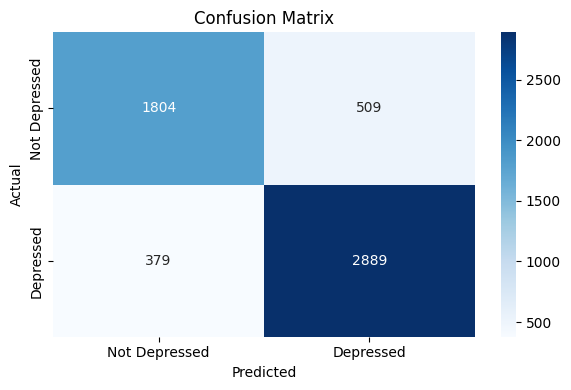

In [111]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()